# Navigation using Dueling Q-Network

## Implementation  

#### Currently this network *does not* perform as well as the DQN *topology* (ongoing)


Dueling Q-Network uses two streams: one for estimating the state-value (value stream) and another for advantages for each action (advantage stream). 

For state `s`, network parameters before the stream split `theta`, value stream parameters `beta`, and advantage stream paramters `alpha`, let the output of the state-value stream be denoted as `V(s; beta, theta)` and the output of the advandate stream be `A(s, a; alpha, theta)`. `V(s; beta, theta)` is a scalar, while `A(s, a; alpha, theta)` is a vector of size `|A|`, where `A` denotes the action space. The output of the Dueling Q-Network is:

    Q(s, a; alpha, beta, theta) = V(s; beta, theta) + (A(s, a; alpha, theta) - mean_a'(A(s, a'; alpha, theta)))
    

*Note*: The results of this architecture were not as good as the DQN architectures. More work is needed.


In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

In [2]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install -U imbalanced-learn
!{sys.executable} -m pip install recordclass
!{sys.executable} -m pip install scikit-image

Requirement already up-to-date: imbalanced-learn in /Users/gertituzi/miniconda3/envs/rl/lib/python3.5/site-packages (0.4.2)


Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [3]:
from sys import platform as _platform

if _platform == "linux" or _platform == "linux2":
   # linux
    env = UnityEnvironment(file_name="./Banana_Linux/Banana.x86_64")
elif _platform == "darwin":
   # MAC OS X
   env = UnityEnvironment(file_name="Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [5]:
print(env.brains)

{'BananaBrain': <unityagents.brain.BrainParameters object at 0x1141e4160>}


### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [7]:
# env_info = env.reset(train_mode=False)[brain_name] # reset the environment
# state = env_info.vector_observations[0]            # get the current state
# score = 0                                          # initialize the score
# while True:
#     action = np.random.randint(action_size)        # select an action
#     env_info = env.step(action)[brain_name]        # send the action to the environment
#     next_state = env_info.vector_observations[0]   # get the next state
#     reward = env_info.rewards[0]                   # get the reward
#     done = env_info.local_done[0]                  # see if episode has finished
#     score += reward                                # update the score
#     state = next_state                             # roll over the state to next time step
#     if done:                                       # exit loop if episode finished
#         break
    
# print("Score: {}".format(score))

When finished, you can close the environment.

In [8]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [9]:
from collections import deque
import torch
import matplotlib.pyplot as plt
from agents.dqn_agent import DuelingAgent

In [10]:
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

In [11]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, w_cost = 0., prefix='dqn'):
    """Deep Q-Learning.

    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []  # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start  # initialize epsilon
    for i_episode in range(1, n_episodes + 1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]  # get the current state
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            
            # "walk" penalty
            eps = 1.0e-2 # Don't wonder around aimlessly
            if (reward < eps ) and (reward > -eps):
                reward = w_cost
            
            agent.step(state, action, reward, next_state, done)
            score += reward
            state = next_state
            if done:
                break
        scores_window.append(score)  # save most recent score
        scores.append(score)  # save most recent score
        eps = max(eps_end, eps_decay * eps)  # decrease epsilon

        print('\rEpisode {}\tAverage Score: {:.2f}, Recent Score: {:.2f}'.format(i_episode, np.mean(scores_window), score), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window) >= 13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f},  Recent Score: {:.2f}'.format(
                i_episode - 100,
                np.mean(scores_window), score))
            torch.save(agent.qnetwork_local.state_dict(), './models/{}_checkpoint.pth'.format(prefix))
            break
            
    return scores


# Prioritized Sampling

## Double DQN
* Use some walk penalty to speed up learning

In [12]:
method='doubledqn'
alpha = 0.9
beta0 = 0.8
w_cost = 0.0

agent = DuelingAgent(state_size=state_size, action_size=action_size, 
                     sample_method = 'prioritized', method=method,
                     seed=0, device=device, alpha = alpha, beta0 = beta0)

scores = dqn(eps_start=1.0, w_cost=w_cost,
             prefix='Pri_a{:.1f}_b{:.1f}_duelingddqn_'.format(alpha, beta0) + method)

Episode 100	Average Score: 7.52, Recent Score: 3.00
Episode 200	Average Score: 9.31, Recent Score: 13.00
Episode 300	Average Score: 9.80, Recent Score: 5.0000
Episode 400	Average Score: 9.62, Recent Score: 3.0000
Episode 500	Average Score: 10.22, Recent Score: 13.00
Episode 600	Average Score: 10.68, Recent Score: 10.00
Episode 700	Average Score: 10.41, Recent Score: 9.000
Episode 800	Average Score: 10.91, Recent Score: 15.00
Episode 900	Average Score: 11.55, Recent Score: 13.00
Episode 1000	Average Score: 10.59, Recent Score: 12.00
Episode 1100	Average Score: 10.33, Recent Score: 9.000
Episode 1200	Average Score: 10.91, Recent Score: 12.00
Episode 1300	Average Score: 11.83, Recent Score: 14.00
Episode 1400	Average Score: 11.80, Recent Score: 15.00
Episode 1500	Average Score: 12.19, Recent Score: 17.00
Episode 1600	Average Score: 11.60, Recent Score: 8.000
Episode 1700	Average Score: 11.99, Recent Score: 15.00
Episode 1800	Average Score: 11.19, Recent Score: 10.00
Episode 1900	Average S

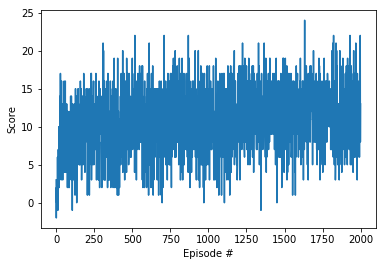

In [13]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

## DQN 
* Some walk penalty

In [14]:
method='dqn'
alpha = 0.9
beta0 = 0.8
w_cost = 0.0

agent = DuelingAgent(state_size=state_size, action_size=action_size,  sample_method = 'prioritized', 
                     method=method, seed=0, device=device, alpha = alpha, beta0 = beta0)

scores = dqn(eps_start=1.0, w_cost=w_cost, 
             prefix='Pri_a{:.1f}_b{:.1f}_duelingdqn_'.format(alpha, beta0) + method)

Episode 100	Average Score: 6.95, Recent Score: 10.00
Episode 200	Average Score: 8.70, Recent Score: 13.00
Episode 300	Average Score: 9.26, Recent Score: 13.00
Episode 400	Average Score: 9.76, Recent Score: 7.000
Episode 500	Average Score: 8.75, Recent Score: 4.000
Episode 600	Average Score: 8.68, Recent Score: 10.00
Episode 700	Average Score: 9.89, Recent Score: 9.0000
Episode 800	Average Score: 8.89, Recent Score: 14.000
Episode 900	Average Score: 9.02, Recent Score: 15.00
Episode 1000	Average Score: 11.08, Recent Score: 7.00
Episode 1100	Average Score: 11.86, Recent Score: 17.00
Episode 1200	Average Score: 10.88, Recent Score: 4.000
Episode 1300	Average Score: 9.90, Recent Score: 8.0000
Episode 1400	Average Score: 10.53, Recent Score: 1.000
Episode 1500	Average Score: 11.92, Recent Score: 17.00
Episode 1600	Average Score: 11.29, Recent Score: 15.00
Episode 1700	Average Score: 10.59, Recent Score: 3.000
Episode 1800	Average Score: 10.86, Recent Score: 8.000
Episode 1900	Average Score:

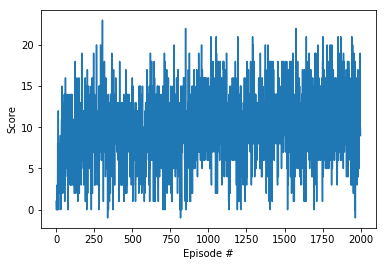

In [15]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# Using Uniform Resampling

## Double DQN

In [16]:
method='doubledqn'
w_cost = 0.0

agent = DuelingAgent(state_size=state_size, action_size=action_size,
                     sample_method = 'uniform', method=method, seed=0)

scores = dqn(eps_start=1.0, eps_decay=0.995, w_cost=w_cost, 
             prefix='Unif_duelingddqn_' + method)

Episode 100	Average Score: 8.10, Recent Score: 7.00
Episode 200	Average Score: 10.29, Recent Score: 11.00
Episode 300	Average Score: 10.68, Recent Score: 17.00
Episode 400	Average Score: 11.07, Recent Score: 15.00
Episode 500	Average Score: 11.40, Recent Score: 9.000
Episode 600	Average Score: 11.03, Recent Score: 9.000
Episode 700	Average Score: 11.40, Recent Score: 18.00
Episode 800	Average Score: 11.40, Recent Score: 12.00
Episode 900	Average Score: 10.79, Recent Score: 11.00
Episode 1000	Average Score: 11.60, Recent Score: 6.00
Episode 1100	Average Score: 12.28, Recent Score: 9.000
Episode 1200	Average Score: 11.02, Recent Score: 10.00
Episode 1300	Average Score: 11.18, Recent Score: 7.000
Episode 1400	Average Score: 11.07, Recent Score: 11.00
Episode 1500	Average Score: 11.41, Recent Score: 15.00
Episode 1600	Average Score: 11.10, Recent Score: 11.00
Episode 1700	Average Score: 11.28, Recent Score: 16.00
Episode 1800	Average Score: 11.18, Recent Score: 17.00
Episode 1900	Average S

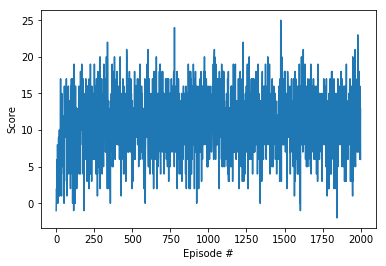

In [17]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

## DQN

In [18]:
method='dqn'
w_cost = 0.0

agent = DuelingAgent(state_size=state_size, action_size=action_size, 
                     sample_method = 'uniform', method=method, seed=0)

scores = dqn(eps_start=1.0, eps_decay=0.995, w_cost=w_cost,
             prefix='Unif_duelingdqn_' + method)

Episode 100	Average Score: 4.26, Recent Score: 9.00
Episode 200	Average Score: 7.97, Recent Score: 10.00
Episode 300	Average Score: 9.29, Recent Score: 9.000
Episode 400	Average Score: 10.48, Recent Score: 14.00
Episode 500	Average Score: 11.17, Recent Score: 11.00
Episode 600	Average Score: 9.77, Recent Score: 10.000
Episode 700	Average Score: 10.04, Recent Score: 10.00
Episode 800	Average Score: 10.76, Recent Score: 12.00
Episode 900	Average Score: 10.77, Recent Score: 7.000
Episode 1000	Average Score: 10.82, Recent Score: 9.00
Episode 1100	Average Score: 9.80, Recent Score: 2.0000
Episode 1200	Average Score: 10.35, Recent Score: 11.00
Episode 1300	Average Score: 10.68, Recent Score: 8.000
Episode 1400	Average Score: 11.42, Recent Score: 13.00
Episode 1500	Average Score: 10.97, Recent Score: 16.00
Episode 1600	Average Score: 11.08, Recent Score: 17.00
Episode 1700	Average Score: 10.98, Recent Score: 8.000
Episode 1800	Average Score: 10.59, Recent Score: 7.000
Episode 1900	Average Sco

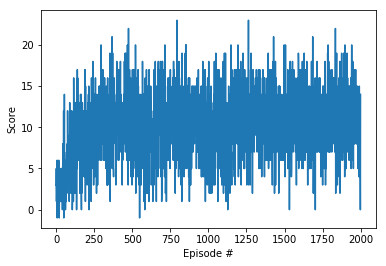

In [19]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()